# Ahmad M. Osman - Dr. Lee, DS320


## Assignment Instructions
Read chapter 3 of the Pandas Cookbook and apply what you read there to this problem. You may skip the final "Calculating a trailing stop order price" recipe on page 111 of the textbook.

Compute the top grossing movies of all time from the 500 best movies. Use the IMDB database (the API to gather information) and the CPI inflation adjustment calculator. Adjust all box office amounts into August 2018 dollars. 

Be careful to write the program to do this for one movie first, then expand it to the top 500 when you have figured out that you have all the right information. Build a CSV file of your results. Put this CSV file in your knuth public_html folder for yourself. 

You should get this to work with one movie first before you expand this to all 500 best movies of all time because you are limited to 1000 calls to the IMDB database in a month.

Then, use Pandas to explore this data using what you read in Chapter 3. Please store your CSV on your web page and reference it with a fully qualified name from your Python Notebook. Upload your Python notebook here with your comments as to what you are looking at in the data set. 

This assignment/exam requires you to do some screen scraping and to read a JSON file. Your goal is to build a CSV file with the data from the IMDB web api in it for the top 100 movies with an "Adjusted Box Office" amount adjusted to August 2018 dollars. 

You should turn in your Python Notebook here having worked through the Chapter 3 material. You should find at least one interesting thing in the data through your data analysis. You must comment on that interesting thing in Python Notebook and show how you found it. 

When you turn in your notebook, make sure it directly references your data on knuth and do not share the name of your CSV file with others in the class. You must access your own CSV file in this exam question but you do not need to upload the CSV file here.


# Interesting Things I Found After Finishing the Assignment


* Christopher Nolan is the highest frequent director for the top 500 movies!
* The Godfather is the highest rated movie with 9.2 imdbRating and a 100 for the Metascore.
* Metascore is the rating of critics while IMDB rating is for users on the website. 
* There is a correlation of 0.42, which is moderate, between Metascore and IMDB rating.
* The older the movie, the higher the rating, can be seen as there is a negative correlation between Metascore/imdbRating and Year. This is stronger for critics than IMDB users.


# Chapter 3: Beginning Data Analysis

## Recipes
* [Developing a data analysis routine](#Developing-a-data-analysis-routine)
* [Reducing memory by changing data types](#Reducing-memory-by-changing-data-types)
* [Selecting the smallest of the largest](#Selecting-the-smallest-of-the-largest)
* [Selecting the largest of each group by sorting](#Selecting-the-largest-of-each-group-by-sorting)
* [Replicating nlargest with sort_values](#Replicating-nlargest-with-sort_values)
* [Correlations](#Correlations)

In [2]:
# we need these libraries
import pandas as pd
import numpy as np
from IPython.display import display
pd.options.display.max_columns = 50

import matplotlib.pyplot as plt

# Developing a data analysis routine

In [3]:
# reading the gather info from knuth
movies = pd.read_csv('http://knuth.luther.edu/~osmaah02/osmanTop500MoviesInflationAdjusted.csv')

In [4]:
# looking at the first five rows
movies.head()

,Unnamed: 0,Title,Genre,Actors,Director,Writer,Production,Awards,Released,Month,Year,BoxOffice,Country,Language,DVD,Metascore,Rated,Runtime,imdbID,imdbRating,imdbVotes,AdjustedForInflationBoxOffice
0,1,Star Wars: Episode I - The Phantom Menace,"Action, Adventure, Fantasy","Liam Neeson, Ewan McGregor, Natalie Portman, J...",George Lucas,George Lucas,20th Century Fox,Nominated for 3 Oscars. Another 26 wins & 65 n...,19 May 1999,May,1999,431000000.0,USA,English,16 Oct 2001,51.0,PG,136 min,tt0120915,6.5,626330.0,6.538804e+08
1,2,The Dark Knight,"Action, Crime, Drama","Christian Bale, Heath Ledger, Aaron Eckhart, M...",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...",Warner Bros. Pictures/Legendary,Won 2 Oscars. Another 152 wins & 155 nominations.,18 Jul 2008,Jul,2008,533316061.0,"USA, UK","English, Mandarin",09 Dec 2008,82.0,PG-13,152 min,tt0468569,9.0,1958197.0,6.113433e+08
2,3,Spider-Man,"Action, Adventure, Sci-Fi","Tobey Maguire, Willem Dafoe, Kirsten Dunst, Ja...",Sam Raimi,"Stan Lee (Marvel comic book), Steve Ditko (Mar...",Columbia Pictures,Nominated for 2 Oscars. Another 16 wins & 58 n...,03 May 2002,May,2002,403706375.0,USA,English,01 Nov 2002,73.0,PG-13,121 min,tt0145487,7.3,614218.0,5.661454e+08
3,4,Forrest Gump,"Drama, Romance","Tom Hanks, Rebecca Williams, Sally Field, Mich...",Robert Zemeckis,"Winston Groom (novel), Eric Roth (screenplay)",Paramount Pictures,Won 6 Oscars. Another 40 wins & 67 nominations.,06 Jul 1994,Jul,1994,330000000.0,USA,English,28 Aug 2001,82.0,PG-13,142 min,tt0109830,8.8,1507796.0,5.607020e+08
4,5,Pirates of the Caribbean: Dead Man's Chest,"Action, Adventure, Fantasy","Johnny Depp, Orlando Bloom, Keira Knightley, J...",Gore Verbinski,"Ted Elliott, Terry Rossio, Ted Elliott (charac...",Buena Vista,Won 1 Oscar. Another 42 wins & 53 nominations.,07 Jul 2006,Jul,2006,423032628.0,USA,"English, Turkish, Greek, Mandarin, French",05 Dec 2006,53.0,PG-13,151 min,tt0383574,7.3,588897.0,5.241572e+08


In [5]:
# we do not need the first column - index
movies.columns

Index(['Unnamed: 0', 'Title', 'Genre', 'Actors', 'Director', 'Writer',
       'Production', 'Awards', 'Released', 'Month', 'Year', 'BoxOffice',
       'Country', 'Language', 'DVD', 'Metascore', 'Rated', 'Runtime', 'imdbID',
       'imdbRating', 'imdbVotes', 'AdjustedForInflationBoxOffice'],
      dtype='object')

In [6]:
# deleting it
del movies["Unnamed: 0"]

In [7]:
movies.head()

,Title,Genre,Actors,Director,Writer,Production,Awards,Released,Month,Year,BoxOffice,Country,Language,DVD,Metascore,Rated,Runtime,imdbID,imdbRating,imdbVotes,AdjustedForInflationBoxOffice
0,Star Wars: Episode I - The Phantom Menace,"Action, Adventure, Fantasy","Liam Neeson, Ewan McGregor, Natalie Portman, J...",George Lucas,George Lucas,20th Century Fox,Nominated for 3 Oscars. Another 26 wins & 65 n...,19 May 1999,May,1999,431000000.0,USA,English,16 Oct 2001,51.0,PG,136 min,tt0120915,6.5,626330.0,6.538804e+08
1,The Dark Knight,"Action, Crime, Drama","Christian Bale, Heath Ledger, Aaron Eckhart, M...",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...",Warner Bros. Pictures/Legendary,Won 2 Oscars. Another 152 wins & 155 nominations.,18 Jul 2008,Jul,2008,533316061.0,"USA, UK","English, Mandarin",09 Dec 2008,82.0,PG-13,152 min,tt0468569,9.0,1958197.0,6.113433e+08
2,Spider-Man,"Action, Adventure, Sci-Fi","Tobey Maguire, Willem Dafoe, Kirsten Dunst, Ja...",Sam Raimi,"Stan Lee (Marvel comic book), Steve Ditko (Mar...",Columbia Pictures,Nominated for 2 Oscars. Another 16 wins & 58 n...,03 May 2002,May,2002,403706375.0,USA,English,01 Nov 2002,73.0,PG-13,121 min,tt0145487,7.3,614218.0,5.661454e+08
3,Forrest Gump,"Drama, Romance","Tom Hanks, Rebecca Williams, Sally Field, Mich...",Robert Zemeckis,"Winston Groom (novel), Eric Roth (screenplay)",Paramount Pictures,Won 6 Oscars. Another 40 wins & 67 nominations.,06 Jul 1994,Jul,1994,330000000.0,USA,English,28 Aug 2001,82.0,PG-13,142 min,tt0109830,8.8,1507796.0,5.607020e+08
4,Pirates of the Caribbean: Dead Man's Chest,"Action, Adventure, Fantasy","Johnny Depp, Orlando Bloom, Keira Knightley, J...",Gore Verbinski,"Ted Elliott, Terry Rossio, Ted Elliott (charac...",Buena Vista,Won 1 Oscar. Another 42 wins & 53 nominations.,07 Jul 2006,Jul,2006,423032628.0,USA,"English, Turkish, Greek, Mandarin, French",05 Dec 2006,53.0,PG-13,151 min,tt0383574,7.3,588897.0,5.241572e+08


In [8]:
# so we have 501 rows of 21 columns
movies.shape

(501, 21)

In [32]:
plt.scatter("Year", "AdjustedForInflationBoxOffice", data=movies)

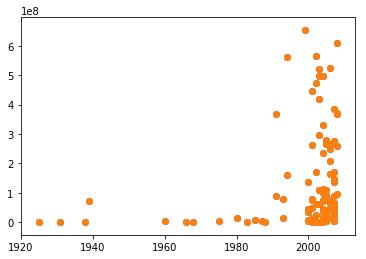

In [33]:
plt.show()

In [34]:
criteria1 = movies.AdjustedForInflationBoxOffice > 0
criteria1.head()

0    True
1    True
2    True
3    True
4    True
Name: AdjustedForInflationBoxOffice, dtype: bool

In [35]:
boMovies = movies[criteria1]
len(boMovies)

103

In [36]:
plt.scatter("Year", "AdjustedForInflationBoxOffice", data=boMovies)

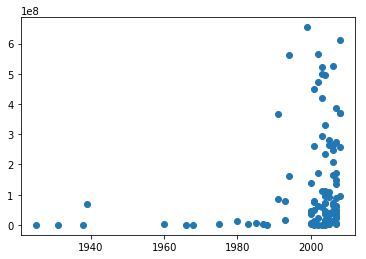

In [37]:
plt.show()

In [9]:
# lets look at data description, numerical value variables only
with pd.option_context('display.max_rows', 8):
    display(movies.describe(include=[np.number]).T)

,count,mean,std,min,25%,50%,75%,max
BoxOffice,103.0,9.915027e+07,1.267858e+08,17599.000000,5.537905e+06,4.456600e+07,1.551940e+08,5.333161e+08
Metascore,375.0,7.908000e+01,1.237749e+01,41.000000,7.000000e+01,8.000000e+01,8.850000e+01,1.000000e+02
imdbRating,501.0,7.872056e+00,4.874603e-01,5.700000,7.600000e+00,7.900000e+00,8.200000e+00,9.300000e+00
imdbVotes,500.0,2.687982e+05,3.229552e+05,1839.000000,3.939950e+04,1.519180e+05,3.701252e+05,1.991481e+06
AdjustedForInflationBoxOffice,103.0,1.333292e+08,1.694578e+08,52503.304194,9.334383e+06,6.293204e+07,1.905554e+08,6.538804e+08


In [10]:
# now lets do the same for categorical variables
movies.describe(include=[np.object, pd.Categorical]).T
# looks like we have two beauty and the beast movies?

,count,unique,top,freq
Title,501,499,Beauty and the Beast,2
Genre,501,160,Drama,38
Actors,500,499,"Mark Hamill, Harrison Ford, Carrie Fisher, Bil...",2
Director,500,299,Steven Spielberg,11
Writer,498,473,Woody Allen,4
Production,491,145,Paramount Pictures,45
Awards,484,416,1 win.,10
Released,500,484,30 Sep 2005,2
Month,500,12,Jun,62
Year,501,82,2004,18


In [11]:
(movies["Title"] == "Beauty and the Beast").value_counts()

False    499
True       2
Name: Title, dtype: int64

In [12]:
# lets get some info about this DataFrame - 
# This tells us how many non-null objects for each column
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 21 columns):
Title                            501 non-null object
Genre                            501 non-null object
Actors                           500 non-null object
Director                         500 non-null object
Writer                           498 non-null object
Production                       491 non-null object
Awards                           484 non-null object
Released                         500 non-null object
Month                            500 non-null object
Year                             501 non-null object
BoxOffice                        103 non-null float64
Country                          501 non-null object
Language                         500 non-null object
DVD                              490 non-null object
Metascore                        375 non-null float64
Rated                            493 non-null object
Runtime                          501 non-null

In [13]:
# lets count the nulls?
movies.isnull().sum()


Title                              0
Genre                              0
Actors                             1
Director                           1
Writer                             3
Production                        10
Awards                            17
Released                           1
Month                              1
Year                               0
BoxOffice                        398
Country                            0
Language                           1
DVD                               11
Metascore                        126
Rated                              8
Runtime                            0
imdbID                             0
imdbRating                         0
imdbVotes                          1
AdjustedForInflationBoxOffice    398
dtype: int64

In [14]:
# looks like we have a lot of them - lets drop the ones that 
# do not have box office values
movies = movies.dropna(subset=["BoxOffice"])

In [15]:
# and we are left with?
movies.count()

Title                            103
Genre                            103
Actors                           103
Director                         103
Writer                           103
Production                       103
Awards                           103
Released                         103
Month                            103
Year                             103
BoxOffice                        103
Country                          103
Language                         103
DVD                              103
Metascore                         99
Rated                            103
Runtime                          103
imdbID                           103
imdbRating                       103
imdbVotes                        103
AdjustedForInflationBoxOffice    103
dtype: int64

In [16]:
# one more statistical description on numerical columns
movies.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
BoxOffice,103.0,9.915027e+07,1.267858e+08,17599.000000,5.537905e+06,4.456600e+07,1.551940e+08,5.333161e+08
Metascore,99.0,7.751515e+01,1.196369e+01,46.000000,6.800000e+01,8.000000e+01,8.550000e+01,1.000000e+02
imdbRating,103.0,7.828155e+00,5.645435e-01,6.100000,7.500000e+00,7.900000e+00,8.200000e+00,9.000000e+00
imdbVotes,103.0,4.662771e+05,3.655323e+05,6831.000000,2.144675e+05,3.913230e+05,6.294355e+05,1.958197e+06
AdjustedForInflationBoxOffice,103.0,1.333292e+08,1.694578e+08,52503.304194,9.334383e+06,6.293204e+07,1.905554e+08,6.538804e+08


In [17]:
# one more statistical description on categorical columns
movies.describe(include=[np.object, pd.Categorical]).T
# I am so happy seeing Christopher Nolan as the highest frequent
# director!

,count,unique,top,freq
Title,103,103,Battleship Potemkin,1
Genre,103,60,Drama,6
Actors,103,103,"Emile Hirsch, Marcia Gay Harden, William Hurt,...",1
Director,103,86,Peter Jackson,4
Writer,103,102,"J.R.R. Tolkien (novel), Fran Walsh (screenplay...",2
Production,103,49,Warner Bros. Pictures,11
Awards,103,102,2 wins & 9 nominations.,2
Released,103,99,30 Sep 2005,2
Month,103,12,Jun,15
Year,103,26,2004,15


## There's more...

In [18]:
# lets look at some percentiles, shall we?
with pd.option_context('display.max_rows', 5):
    display(movies.describe(include=[np.number], 
                 percentiles=[.01, .05, .10, .25, .5, .75, .9, .95, .99]).T)

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
BoxOffice,103.0,9.915027e+07,1.267858e+08,17599.000000,26978.480000,146021.000000,6.460080e+05,5.537905e+06,4.456600e+07,1.551940e+08,3.180300e+08,3.724401e+08,4.308407e+08,5.333161e+08
Metascore,99.0,7.751515e+01,1.196369e+01,46.000000,50.900000,54.800000,6.200000e+01,6.800000e+01,8.000000e+01,8.550000e+01,9.220000e+01,9.500000e+01,9.804000e+01,1.000000e+02
imdbRating,103.0,7.828155e+00,5.645435e-01,6.100000,6.204000,6.910000,7.200000e+00,7.500000e+00,7.900000e+00,8.200000e+00,8.500000e+00,8.690000e+00,8.898000e+00,9.000000e+00
imdbVotes,103.0,4.662771e+05,3.655323e+05,6831.000000,9508.900000,29618.300000,6.159920e+04,2.144675e+05,3.913230e+05,6.294355e+05,9.286596e+05,1.129007e+06,1.506249e+06,1.958197e+06
AdjustedForInflationBoxOffice,103.0,1.333292e+08,1.694578e+08,52503.304194,297638.803932,575925.574444,1.817937e+06,9.334383e+06,6.293204e+07,1.905554e+08,4.121593e+08,5.203942e+08,6.104393e+08,6.538804e+08


# Reducing memory by changing data types

In [19]:
movies.columns

Index(['Title', 'Genre', 'Actors', 'Director', 'Writer', 'Production',
       'Awards', 'Released', 'Month', 'Year', 'BoxOffice', 'Country',
       'Language', 'DVD', 'Metascore', 'Rated', 'Runtime', 'imdbID',
       'imdbRating', 'imdbVotes', 'AdjustedForInflationBoxOffice'],
      dtype='object')

In [20]:
# lets look at some of the columns and how can we reduce the memory usage
different_cols = ['Title', 'Actors', 'Writer', 'Awards', 'BoxOffice', "AdjustedForInflationBoxOffice", "Rated"]
col2 = movies.loc[:, different_cols]
col2.head()

,Title,Actors,Writer,Awards,BoxOffice,AdjustedForInflationBoxOffice,Rated
0,Star Wars: Episode I - The Phantom Menace,"Liam Neeson, Ewan McGregor, Natalie Portman, J...",George Lucas,Nominated for 3 Oscars. Another 26 wins & 65 n...,431000000.0,6.538804e+08,PG
1,The Dark Knight,"Christian Bale, Heath Ledger, Aaron Eckhart, M...","Jonathan Nolan (screenplay), Christopher Nolan...",Won 2 Oscars. Another 152 wins & 155 nominations.,533316061.0,6.113433e+08,PG-13
2,Spider-Man,"Tobey Maguire, Willem Dafoe, Kirsten Dunst, Ja...","Stan Lee (Marvel comic book), Steve Ditko (Mar...",Nominated for 2 Oscars. Another 16 wins & 58 n...,403706375.0,5.661454e+08,PG-13
3,Forrest Gump,"Tom Hanks, Rebecca Williams, Sally Field, Mich...","Winston Groom (novel), Eric Roth (screenplay)",Won 6 Oscars. Another 40 wins & 67 nominations.,330000000.0,5.607020e+08,PG-13
4,Pirates of the Caribbean: Dead Man's Chest,"Johnny Depp, Orlando Bloom, Keira Knightley, J...","Ted Elliott, Terry Rossio, Ted Elliott (charac...",Won 1 Oscar. Another 42 wins & 53 nominations.,423032628.0,5.241572e+08,PG-13


In [21]:
col2.dtypes

Title                             object
Actors                            object
Writer                            object
Awards                            object
BoxOffice                        float64
AdjustedForInflationBoxOffice    float64
Rated                             object
dtype: object

In [22]:
#Find the memory usage of each column with the memory_usage method:
original_mem = col2.memory_usage(deep=True)
original_mem

Index                              824
Title                             7675
Actors                           12113
Writer                           14797
Awards                           10294
BoxOffice                          824
AdjustedForInflationBoxOffice      824
Rated                             6601
dtype: int64

In [23]:
# I do not see any reaon to change the data types - will skip this.

In [24]:
# We have a lot of unique values - excepted for the Rated column
col2.select_dtypes(include=['object']).nunique()

Title     103
Actors    103
Writer    102
Awards    102
Rated       6
dtype: int64

In [25]:
# we can convert the Rated column into a categorical data type
# to save memory space
col2['Rated'] = col2['Rated'].astype('category')
col2.dtypes

Title                              object
Actors                             object
Writer                             object
Awards                             object
BoxOffice                         float64
AdjustedForInflationBoxOffice     float64
Rated                            category
dtype: object

In [26]:
# Let compute the memory again
# We will see a difference in the rated column
new_mem = col2.memory_usage(deep=True)
new_mem

Index                              824
Title                             7690
Actors                           12666
Writer                           15157
Awards                           10294
BoxOffice                          824
AdjustedForInflationBoxOffice      824
Rated                              647
dtype: int64

In [27]:
# percentage of memory saved for each type
new_mem / original_mem
# we can see we saved 90% of memory that was used by Rated

Index                            1.000000
Title                            1.001954
Actors                           1.045653
Writer                           1.024329
Awards                           1.000000
BoxOffice                        1.000000
AdjustedForInflationBoxOffice    1.000000
Rated                            0.098015
dtype: float64

## There's more...

In [28]:
movies.columns

Index(['Title', 'Genre', 'Actors', 'Director', 'Writer', 'Production',
       'Awards', 'Released', 'Month', 'Year', 'BoxOffice', 'Country',
       'Language', 'DVD', 'Metascore', 'Rated', 'Runtime', 'imdbID',
       'imdbRating', 'imdbVotes', 'AdjustedForInflationBoxOffice'],
      dtype='object')

In [29]:
movies[['Language', 'Country']].memory_usage(deep=True)

Index        824
Language    7513
Country     6792
dtype: int64

In [30]:
# more into memory
# changing a single value would lead to the change of the memory usage
movies.loc[0, 'Language'] = 10000000
movies.loc[0, 'Country'] = college.loc[0, 'Country'] + 'a'
# college.loc[1, 'INSTNM'] = college.loc[1, 'INSTNM'] + 'a'
college[['Language', 'Country']].memory_usage(deep=True)

NameError: name 'college' is not defined

In [ ]:
college['Language'].dtype

In [ ]:
college['Language'].astype('int8') # ValueError

In [ ]:
# more statistical, numerical, descriptions
movies.describe(include=['int64', 'float64']).T

In [ ]:
movies.describe(include=[np.int64, np.float64]).T

In [ ]:
# another error - value conversion error
movies['Rated'] = college['RELAFFIL'].astype(np.int8)

In [ ]:
movies.describe(include=['int', 'float']).T  # defaults to 64 bit int/floats

In [ ]:
movies.describe(include=['number']).T  # also works as the default int/float are 64 bits

In [ ]:
# memory usage
movies.index = pd.Int64Index(movies.index)
movies.index.memory_usage()

# Selecting the smallest of the largest

In [ ]:
movies.columns

In [ ]:
# lets look at the least successful movies
movies2 = movies[['Title', 'AdjustedForInflationBoxOffice', 'imdbRating', 'Metascore']]
movies2.head()

In [ ]:
# selecting the top 20 movies by imdbRating
movies2.nlargest(20, 'imdbRating').head()

In [ ]:
# now lets get the top 20 by imdbRating that are of the smallest 5 of
# AdjustedForInflationBoxOffice
movies2.nlargest(20, 'imdbRating').nsmallest(5, 'AdjustedForInflationBoxOffice')

# Selecting the largest of each group by sorting

In [ ]:
movies2 = movies[['Title', 'Year', 'AdjustedForInflationBoxOffice', 'imdbRating', 'Metascore']]
movies2.head()

In [ ]:
# lets sort by year
movies2.sort_values('Year', ascending=False).head()

In [ ]:
# sorting by year and imdbRating would be different though...
movies3 = movies2.sort_values(['Year','imdbRating'], ascending=False)
movies3.head()

In [ ]:
movie_top_year = movies3.drop_duplicates(subset='Year')
movie_top_year.head()

In [ ]:
# multiple sort values
movies4 = movies[['Title', 'Year', 'Rated', 'AdjustedForInflationBoxOffice']]
movies4_sorted = movies4.sort_values(['Title', 'Year', 'Rated', 'AdjustedForInflationBoxOffice'], 
                                   ascending=[False, False, True, True])
movies4_sorted.drop_duplicates(subset=['Title', 'Year', 'Rated', 'AdjustedForInflationBoxOffice']).head(10)

# Replicating nlargest with sort_values

In [ ]:
# more into that
movies2 = movies[['Title', 'imdbRating', 'AdjustedForInflationBoxOffice']]
movies_smallest_largest = movies2.nlargest(100, 'imdbRating').nsmallest(5, 'AdjustedForInflationBoxOffice')
movies_smallest_largest

In [ ]:
movies2.sort_values('imdbRating', ascending=False).head(100).head()

In [ ]:
movies2.sort_values('imdbRating', ascending=False).head(100).sort_values('AdjustedForInflationBoxOffice').head()

In [ ]:
movies2.nlargest(100, 'imdbRating').tail()

In [ ]:
movies2.sort_values('imdbRating', ascending=False).head(100).tail()

# Correlations

In [ ]:
movies.columns

In [ ]:
# no strong correlation between year and BoxOffice
movies["Year"].astype("int64").corr(movies["BoxOffice"])

In [ ]:
# critics and imdb users kinda of agree on ratings...
movies["imdbRating"].corr(movies["Metascore"])

In [ ]:
# we can see that the older the movie, the better the rating...
# not a very strong correlation, but it is there
movies["Year"].astype("int64").corr(movies["imdbRating"])

In [ ]:
# same thing, even a little stronger, for critics
movies["Year"].astype("int64").corr(movies["Metascore"])

# Interesting Things I Found After Finishing the Assignment


* Christopher Nolan is the highest frequent director for the top 500 movies!
* The Godfather is the highest rated movie with 9.2 imdbRating and a 100 for the Metascore.
* Metascore is the rating of critics while IMDB rating is for users on the website. 
* There is a correlation of 0.42, which is moderate, between Metascore and IMDB rating.
* The older the movie, the higher the rating, can be seen as there is a negative correlation between Metascore/imdbRating and Year. This is stronger for critics than IMDB users.
